# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [60]:
df =  pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [61]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

if "PRIMARY_KEY" in df.columns:
    df.drop("PRIMARY_KEY", axis = 1, inplace=True)

In [62]:
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

In [63]:
std_dev_math_8_by_state = df.groupby('STATE')['AVG_MATH_8_SCORE'].std()
print(std_dev_math_8_by_state)
df['AVG_MATH_8_SCORE'] = df.groupby('STATE')['AVG_MATH_8_SCORE'].transform(lambda x: x.fillna(x.mean()))
df['AVG_MATH_4_SCORE'] = df.groupby('STATE')['AVG_MATH_4_SCORE'].transform(lambda x: x.fillna(x.mean()))

STATE
ALABAMA                  6.042777
ALASKA                   3.122499
ARIZONA                  7.139306
ARKANSAS                 8.708669
CALIFORNIA               6.965282
COLORADO                 7.467505
CONNECTICUT              5.395705
DELAWARE                 7.897065
DISTRICT_OF_COLUMBIA    13.482874
DODEA                    4.756282
FLORIDA                  8.442318
GEORGIA                  7.929615
HAWAII                   9.443211
IDAHO                    5.166911
ILLINOIS                 6.640099
INDIANA                  6.916712
IOWA                     2.272364
KANSAS                   3.247221
KENTUCKY                 7.738139
LOUISIANA                9.130369
MAINE                    3.316625
MARYLAND                 8.877534
MASSACHUSETTS            9.069429
MICHIGAN                 5.219428
MINNESOTA                6.045284
MISSISSIPPI              8.418594
MISSOURI                 4.755858
MONTANA                  3.600505
NATIONAL                 7.013723
NEBRASKA

In [64]:
df

,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.000000,252.0,207.0,NaN
1,ALASKA,1992,122487.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,234.777778,280.0,NaN,NaN
2,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.000000,265.0,209.0,NaN
3,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.000000,256.0,211.0,NaN
4,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.000000,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.000000,287.0,224.0,262.0
1711,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.000000,286.0,220.0,266.0
1712,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.000000,272.0,213.0,256.0
1713,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.000000,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [65]:
len(df["YEAR"].unique())

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [66]:
michigan_average =  df["AVG_MATH_8_SCORE"].mean()
ohio_average = df["AVG_MATH_8_SCORE"].mean()

if max(michigan_average,ohio_average) == michigan_average:
    print(f"Michigan : {michigan_average}")
else:
    print(f"Ohio : {ohio_average}")

Michigan : 278.4384690139792


Find the average for your chosen test across all states in 2019

In [67]:
df[df["YEAR"]==2019]["AVG_MATH_8_SCORE"].mean()

281.2641509433962

For each state, find a maximum value for your chosen test score

In [68]:
df.groupby("STATE")["AVG_MATH_8_SCORE"].max().sort_values(ascending=False)

STATE
MASSACHUSETTS           301.0
NEW_JERSEY              296.0
NEW_HAMPSHIRE           296.0
VERMONT                 295.0
MINNESOTA               295.0
NORTH_DAKOTA            293.0
DODEA                   293.0
MONTANA                 293.0
COLORADO                292.0
SOUTH_DAKOTA            291.0
TEXAS                   290.0
WASHINGTON              290.0
VIRGINIA                290.0
KANSAS                  290.0
PENNSYLVANIA            290.0
OHIO                    290.0
WYOMING                 289.0
CONNECTICUT             289.0
WISCONSIN               289.0
MAINE                   289.0
MARYLAND                288.0
NEBRASKA                288.0
INDIANA                 288.0
UTAH                    287.0
IDAHO                   287.0
NORTH_CAROLINA          286.0
MISSOURI                286.0
IOWA                    286.0
NATIONAL                285.0
ILLINOIS                285.0
OREGON                  285.0
DELAWARE                284.0
RHODE_ISLAND            284.0
ALAS

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [69]:
df.TOTAL_REVENUE/df.TOTAL_EXPENDITURE

0       1.009453
1       1.079284
2       0.957813
3       0.982179
4       0.967618
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Length: 1715, dtype: float64

In [71]:
if "PRIMARY_KEY" in df.columns:
    df.drop(["PRIMARY_KEY","GRADES_1_8_G", "GRADES_PK_G", "GRADES_KG_G", "GRADES_9_12_G", "GRADES_12_G"], axis = 1, inplace=True)

df.dropna(subset =["TOTAL_REVENUE"], inplace=True)

#Scaling values of  Expenditure by dividing by scalar,
df["EXPENDITURE IN MILLIONS"] = df.TOTAL_EXPENDITURE/1_000_000

#Checking the correlation of grade 8 avg math score.
numerical_cols = df.select_dtypes(include=[np.number])
corr_matrix = numerical_cols.corr()
math_8_corr = corr_matrix['AVG_MATH_8_SCORE'].drop('AVG_MATH_8_SCORE')
math_8_corr_sorted = math_8_corr.reindex(math_8_corr.abs().sort_values(ascending=False).index)
math_8_corr_sorted

# Checking the correlation of grade 4 avg math score.
math_4_corr = corr_matrix['AVG_MATH_4_SCORE'].drop('AVG_MATH_4_SCORE')
math_4_corr_sorted = math_4_corr.reindex(math_4_corr.abs().sort_values(ascending=False).index)
math_4_corr_sorted

AVG_MATH_8_SCORE                0.923516
AVG_READING_8_SCORE             0.843826
AVG_READING_4_SCORE             0.740590
YEAR                            0.264889
LOCAL_REVENUE                   0.114832
INSTRUCTION_EXPENDITURE         0.064432
SUPPORT_SERVICES_EXPENDITURE    0.064363
TOTAL_REVENUE                   0.063035
EXPENDITURE IN MILLIONS         0.060844
TOTAL_EXPENDITURE               0.060844
ENROLL_KINDER                  -0.051668
ENROLL_4                       -0.047587
ENROLL_PRIMARY                 -0.043121
ENROLL_ALL_EST                 -0.039222
ENROLL_PREK                     0.037952
ENROLL_ALL                     -0.037758
ENROLL_8                       -0.034184
ENROLL_HS                      -0.025890
STATE_REVENUE                   0.022552
CAPITAL_OUTLAY_EXPENDITURE      0.017066
FEDERAL_REVENUE                -0.012438
OTHER_EXPENDITURE              -0.008946
ENROLL_12                      -0.002190
Name: AVG_MATH_4_SCORE, dtype: float64

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**
Primary key is redudant.

I am trying to find if threre is any relation between grade 8 score and other indpendent variables and I beleieve that no of students in other grades do not matter a lot.

Some values like Expenditure and revenue are to big to compare with values like grade 8 average, hence scaling them down by didvingg them with a vector.

Also checked for correlations and found the highest correlation between the grade 4 score and the grade 8 score

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average Math Score')

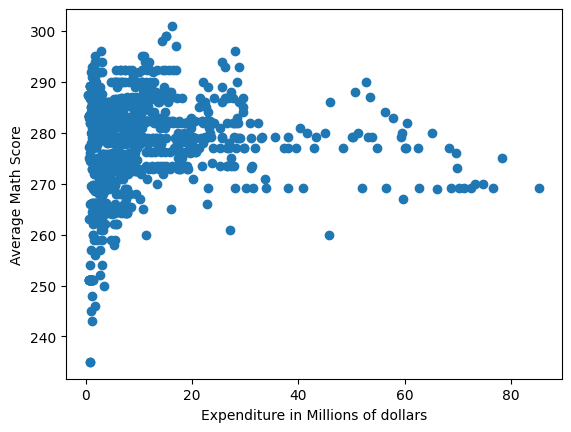

In [72]:
plt.scatter(x = df['EXPENDITURE IN MILLIONS'], y=df["AVG_MATH_8_SCORE"])
plt.xlabel("Expenditure in Millions of dollars")
plt.ylabel("Average Math Score")


There is little to no relation between the expenditure and the average math score. Surprising!

**Visualization 2**

Text(0, 0.5, 'Grade 8 score')

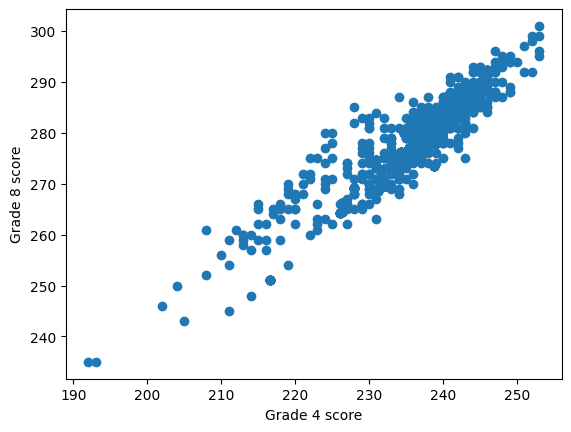

In [73]:
plt.scatter(x = df.AVG_MATH_4_SCORE, y=df.AVG_MATH_8_SCORE)
plt.xlabel("Grade 4 score")
plt.ylabel("Grade 8 score")

As seen in the correlation the score in gradee 4 is highly related tot the final score

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [79]:
from sklearn.model_selection import train_test_split

In [88]:
X =  df[["AVG_MATH_4_SCORE"]]
y =  df[["AVG_MATH_8_SCORE"]]

In [89]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
# create your model here
model = LinearRegression()

In [92]:
model.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred = model.predict(X_test)
y_pred

array([[282.66092473],
       [275.85274789],
       [277.88533402],
       [284.83164779],
       [287.00237084],
       [276.99292565],
       [265.29514032],
       [280.49020168],
       [282.5622555 ],
       [258.78297116],
       [278.31947863],
       [279.40484016],
       [288.08773236],
       [282.75959396],
       [268.15654798],
       [278.41814786],
       [287.00237084],
       [267.76187106],
       [282.66092473],
       [280.49020168],
       [272.79400177],
       [269.53791719],
       [269.63658642],
       [285.91700931],
       [272.892671  ],
       [291.34381694],
       [274.5700479 ],
       [273.48468638],
       [268.15654798],
       [276.24742481],
       [275.75407866],
       [284.83164779],
       [267.76187106],
       [284.23963241],
       [279.2075017 ],
       [269.63658642],
       [283.09506934],
       [280.49020168],
       [288.08773236],
       [279.40484016],
       [283.09506934],
       [279.40484016],
       [281.3584909 ],
       [281

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 2.5959
Mean Squared Error (MSE): 12.2926
Root Mean Squared Error (RMSE): 3.5061


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
col_name = 'COLUMN NAME OF ONE PREDICTOR'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

In [19]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")